## PROBLEM 1: Aminer : basic dataset analysis

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

%matplotlib inline

In [3]:
#index ---- index id of this paper
#* ---- paper title
#@ ---- authors (separated by semicolons)
#t ---- year
#c ---- publication venue
#% ---- the id of references of this paper (there are multiple lines, with each indicating a reference)
#! ---- abstract

In [4]:
def gen():
    with open('AP_train.txt', 'r',  encoding="utf8") as f:
        datum={}
        citations =0
        row=0
        readFile = f.readlines()
        for line in readFile:
            
            if '#index' in line:
                if bool(datum):
                    datum['citations'] = citations
                    try:
                        for i in range(len(datum['author'])):
                            
                            datum_to_save = datum.copy()
                            datum_to_save['author']=datum['author'][i]
                            yield datum_to_save
                            row+=1
                    except IndexError as e:
                        continue
                    
                    datum={}
                    citations =0
                datum['id'] = line[7:].rstrip()
                
            elif '#*' in line:
                datum['title'] = line[3:].rstrip()
            elif '#@' in line:
                datum['author'] = line[3:].rstrip().rsplit(";")
            elif '#t' in line:
                datum['year'] = line[3:].rstrip()
            elif '#c' in line:
                datum['venue'] = line[3:].rstrip()
            elif '#%' in line:
                citations +=1
            elif '#!' in line:
                datum['abstract'] = line[3:].rstrip()


data = pd.DataFrame(gen(), columns =('id', 'title', 'author', 'year', 
                                  'venue', 'citations', 'abstract'))
data['year'] =pd.to_numeric(data['year'], errors = 'coerce').fillna(0)

In [5]:
data

,id,title,author,year,venue,citations,abstract
0,1,Book Review: Discover Linux,Marjorie Richardson,1998.0,Linux Journal,0,NaN
1,2,MOSFET table look-up models for circuit simula...,,1984.0,"Integration, the VLSI Journal",0,NaN
2,3,The verification of the protection mechanisms ...,Virgil D. Gligor,1984.0,International Journal of Parallel Programming,0,NaN
3,4,Another view of functional and multivalued dep...,M. Gyssens,1984.0,International Journal of Parallel Programming,0,NaN
4,4,Another view of functional and multivalued dep...,J. Paredaens,1984.0,International Journal of Parallel Programming,0,NaN
5,5,Entity-relationship diagrams which are in BCNF,Sushil Jajodia,1984.0,International Journal of Parallel Programming,0,NaN
6,5,Entity-relationship diagrams which are in BCNF,Peter A. Ng,1984.0,International Journal of Parallel Programming,0,NaN
7,5,Entity-relationship diagrams which are in BCNF,Frederick N. Springsteel,1984.0,International Journal of Parallel Programming,0,NaN
8,6,The computer comes of age,Rene Moreau,1984.0,The computer comes of age,0,NaN
9,7,Computationally efficient algorithms for a one...,A. G. Akritas,1984.0,International Journal of Parallel Programming,0,NaN


In [6]:
data.describe(include="all")

,id,title,author,year,venue,citations,abstract
count,4909838,4909838,4909838,4.909838e+06,4909838,4.909838e+06,3884999
unique,1976814,1929486,1484983,NaN,255690,NaN,1383869
top,569905,Preface,,NaN,Microelectronic Engineering,NaN,First Page of the Article
freq,115,601,42176,NaN,30238,NaN,9510
mean,NaN,NaN,NaN,2.003641e+03,NaN,4.255447e+00,NaN
std,NaN,NaN,NaN,1.595765e+01,NaN,7.541541e+00,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,2.000000e+03,NaN,0.000000e+00,NaN
50%,NaN,NaN,NaN,2.006000e+03,NaN,0.000000e+00,NaN
75%,NaN,NaN,NaN,2.009000e+03,NaN,6.000000e+00,NaN


> <b> A. Compute the number of distinct authors, publication venues, publications, and citations/references<b>

In [7]:
data.nunique()

id           1976814
title        1929486
author       1484983
year              70
venue         255690
citations        236
abstract     1383869
dtype: int64

 > <b> B. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases”13 – what do you notice?

In [8]:
data.loc[data['venue'] == 'Principles and Practice of Knowledge Discovery in Databases']

,id,title,author,year,venue,citations,abstract


In [9]:
data['venue']

0                                              Linux Journal
1                              Integration, the VLSI Journal
2              International Journal of Parallel Programming
3              International Journal of Parallel Programming
4              International Journal of Parallel Programming
5              International Journal of Parallel Programming
6              International Journal of Parallel Programming
7              International Journal of Parallel Programming
8                                  The computer comes of age
9              International Journal of Parallel Programming
10             International Journal of Parallel Programming
11             International Journal of Parallel Programming
12            Information Sciences: an International Journal
13            Information Sciences: an International Journal
14            Information Sciences: an International Journal
15            Information Sciences: an International Journal
16                      

In [10]:
data[data['title'].astype(str).str.contains('Principles and Practice of Knowledge Discovery in Databases')].count()

id           23
title        23
author       23
year         23
venue        23
citations    23
abstract      0
dtype: int64

In [11]:
data[data['venue'].astype(str).str.contains('Principles and Practice of Knowledge Discovery in Databases')]

,id,title,author,year,venue,citations,abstract
1638438,799597,Summarization of dynamic content in web collec...,Adam Jatowt,2004.0,PKDD '04 Proceedings of the 8th European Confe...,8,This paper describes a new research proposal o...
1638439,799597,Summarization of dynamic content in web collec...,Mitsuru Ishizuka,2004.0,PKDD '04 Proceedings of the 8th European Confe...,8,This paper describes a new research proposal o...
1638800,799734,Proceedings of the 8th European Conference on ...,Jean-François Boulicaut,2004.0,PKDD '04 Proceedings of the 8th European Confe...,0,NaN
1638801,799734,Proceedings of the 8th European Conference on ...,Floriana Esposito,2004.0,PKDD '04 Proceedings of the 8th European Confe...,0,NaN
1638802,799734,Proceedings of the 8th European Conference on ...,Fosca Giannotti,2004.0,PKDD '04 Proceedings of the 8th European Confe...,0,NaN
1638803,799734,Proceedings of the 8th European Conference on ...,Dino Pedreschi,2004.0,PKDD '04 Proceedings of the 8th European Confe...,0,NaN
1638804,799735,Random matrices in data analysis,Dimitris Achlioptas,2004.0,PKDD '04 Proceedings of the 8th European Confe...,0,We show how carefully crafted random matrices ...
1638805,799736,Data privacy,Rakesh Agrawal,2004.0,PKDD '04 Proceedings of the 8th European Confe...,0,There is increasing need to build information ...
1638806,799737,Breaking through the syntax barrier: searching...,Soumen Chakrabarti,2004.0,PKDD '04 Proceedings of the 8th European Confe...,0,The next wave in search technology will be dri...
1638807,799738,Real-world learning with Markov logic networks,Pedro Domingos,2004.0,PKDD '04 Proceedings of the 8th European Confe...,0,Machine learning and data mining systems have ...


> <b> C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

In [12]:
data['author'].replace('', np.nan, inplace=True)

In [13]:
data

,id,title,author,year,venue,citations,abstract
0,1,Book Review: Discover Linux,Marjorie Richardson,1998.0,Linux Journal,0,NaN
1,2,MOSFET table look-up models for circuit simula...,NaN,1984.0,"Integration, the VLSI Journal",0,NaN
2,3,The verification of the protection mechanisms ...,Virgil D. Gligor,1984.0,International Journal of Parallel Programming,0,NaN
3,4,Another view of functional and multivalued dep...,M. Gyssens,1984.0,International Journal of Parallel Programming,0,NaN
4,4,Another view of functional and multivalued dep...,J. Paredaens,1984.0,International Journal of Parallel Programming,0,NaN
5,5,Entity-relationship diagrams which are in BCNF,Sushil Jajodia,1984.0,International Journal of Parallel Programming,0,NaN
6,5,Entity-relationship diagrams which are in BCNF,Peter A. Ng,1984.0,International Journal of Parallel Programming,0,NaN
7,5,Entity-relationship diagrams which are in BCNF,Frederick N. Springsteel,1984.0,International Journal of Parallel Programming,0,NaN
8,6,The computer comes of age,Rene Moreau,1984.0,The computer comes of age,0,NaN
9,7,Computationally efficient algorithms for a one...,A. G. Akritas,1984.0,International Journal of Parallel Programming,0,NaN


In [14]:
data_new= data.dropna()

In [15]:
data_new

,id,title,author,year,venue,citations,abstract
67,46,On the Multiple Implementation of Abstract Dat...,J. R White,1983.0,IEEE Transactions on Software Engineering,0,A fundamental step in the software design proc...
157,103,Smalltalk-80: the language and its implementation,Adele Goldberg,1983.0,Smalltalk-80: the language and its implementation,0,From the Preface (See Front Matter for full Pr...
158,103,Smalltalk-80: the language and its implementation,David Robson,1983.0,Smalltalk-80: the language and its implementation,0,From the Preface (See Front Matter for full Pr...
181,119,Algorithms for trie compaction,M. Al-Suwaiyel,1984.0,ACM Transactions on Database Systems (TODS),9,The trie data structure has many properties wh...
182,119,Algorithms for trie compaction,E Horowitz,1984.0,ACM Transactions on Database Systems (TODS),9,The trie data structure has many properties wh...
212,135,"Logical, internal, and physical reference beha...",Wolfgang Effelsberg,1984.0,ACM Transactions on Database Systems (TODS),16,This work investigates one aspect of the perfo...
213,135,"Logical, internal, and physical reference beha...",Mary E. S. Loomis,1984.0,ACM Transactions on Database Systems (TODS),16,This work investigates one aspect of the perfo...
214,136,A parallel pipelined relational query processor,Won Kim,1984.0,ACM Transactions on Database Systems (TODS),21,This paper presents the design of a relational...
215,136,A parallel pipelined relational query processor,Daniel Gajski,1984.0,ACM Transactions on Database Systems (TODS),21,This paper presents the design of a relational...
216,136,A parallel pipelined relational query processor,David J. Kuck,1984.0,ACM Transactions on Database Systems (TODS),21,This paper presents the design of a relational...


In [16]:
data_new['venue'].where(data_new['author']=="J. R White").count()

1

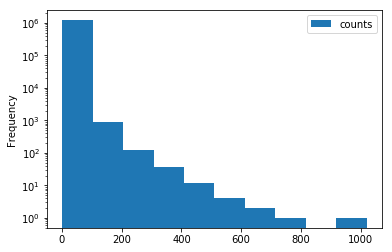

In [17]:
data_new.groupby(['author']).size().reset_index(name='counts').plot.hist()
plt.yscale('log')
plt.show()

> <b> D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

In [18]:
count = data_new.groupby(['author']).size()

In [19]:
mean = count.mean() #for the cleaned data 

stddev = count.std()

med = count.median()

min_count = count.min()

max_count = count.max()

q75, q25 = np.percentile(count, [75,25])
iqr = q75 - q25

In [20]:
print ("Author publication stats : min = {} median = {} max = {} mean = {} stddev = {}, Q1 = {}, Q3 = {}, inter quartile range = {}".format(min_count, med, max_count, mean, stddev, q25, q75, iqr))

Author publication stats : min = 1 median = 1.0 max = 1020 mean = 3.1812952539153247 stddev = 8.082042843429882, Q1 = 1.0, Q3 = 2.0, inter quartile range = 1.0


In [21]:
count.describe()

count    1.216055e+06
mean     3.181295e+00
std      8.082043e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.020000e+03
dtype: float64

> <b> E. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?

In [22]:
count_venue = data_new.groupby(['venue']).size().reset_index(name = 'count_venue')

In [23]:
count_venue = count_venue['count_venue']

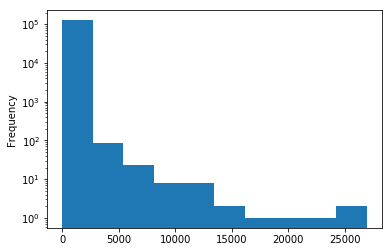

In [24]:
count_venue.plot.hist()
plt.yscale("log")
plt.show()

Venue publication stats: min=1 Q1=1 median=1 Q3=1 max=11,227 mean=7.73 stddev=83.38
Venue with most references: IEEE Transactions on Information Theory

In [25]:
count_venue.describe()

count    126997.000000
mean         30.462373
std         257.144827
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max       26952.000000
Name: count_venue, dtype: float64

In [26]:
data_count = data_new.groupby(['venue']).size().reset_index(name='counts')

In [27]:
data_count= data_count['counts']

In [28]:
data_count

0           2
1           4
2           1
3           2
4           2
5           2
6           1
7           3
8           2
9           1
10          1
11          1
12          1
13          1
14          2
15          2
16          3
17          2
18          2
19          1
20          2
21          2
22          2
23          2
24          2
25          2
26          2
27          2
28          2
29          2
         ... 
126967      1
126968      1
126969      1
126970      1
126971     10
126972      5
126973      2
126974    172
126975      2
126976      1
126977      1
126978      1
126979      2
126980      1
126981      3
126982      2
126983      3
126984      3
126985      2
126986      3
126987      4
126988      3
126989      3
126990      2
126991      2
126992      1
126993      1
126994      3
126995      2
126996     99
Name: counts, Length: 126997, dtype: int64

In [29]:
data_new

,id,title,author,year,venue,citations,abstract
67,46,On the Multiple Implementation of Abstract Dat...,J. R White,1983.0,IEEE Transactions on Software Engineering,0,A fundamental step in the software design proc...
157,103,Smalltalk-80: the language and its implementation,Adele Goldberg,1983.0,Smalltalk-80: the language and its implementation,0,From the Preface (See Front Matter for full Pr...
158,103,Smalltalk-80: the language and its implementation,David Robson,1983.0,Smalltalk-80: the language and its implementation,0,From the Preface (See Front Matter for full Pr...
181,119,Algorithms for trie compaction,M. Al-Suwaiyel,1984.0,ACM Transactions on Database Systems (TODS),9,The trie data structure has many properties wh...
182,119,Algorithms for trie compaction,E Horowitz,1984.0,ACM Transactions on Database Systems (TODS),9,The trie data structure has many properties wh...
212,135,"Logical, internal, and physical reference beha...",Wolfgang Effelsberg,1984.0,ACM Transactions on Database Systems (TODS),16,This work investigates one aspect of the perfo...
213,135,"Logical, internal, and physical reference beha...",Mary E. S. Loomis,1984.0,ACM Transactions on Database Systems (TODS),16,This work investigates one aspect of the perfo...
214,136,A parallel pipelined relational query processor,Won Kim,1984.0,ACM Transactions on Database Systems (TODS),21,This paper presents the design of a relational...
215,136,A parallel pipelined relational query processor,Daniel Gajski,1984.0,ACM Transactions on Database Systems (TODS),21,This paper presents the design of a relational...
216,136,A parallel pipelined relational query processor,David J. Kuck,1984.0,ACM Transactions on Database Systems (TODS),21,This paper presents the design of a relational...


In [30]:
data_new['count'].max()

KeyError: 'count'

In [ ]:
max_venue = data_new.sort_values(by='count', ascending=False)['venue'][:1]
max_venue

> <b> F. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?


In [ ]:
max_citations = data_new.sort_values(by='citations', ascending=False)

In [ ]:
data_new['citations'].plot.hist()
plt.yscale('log')
plt.show()

In [ ]:
data_new.groupby(['id']).size().plot.hist()
plt.yscale('log')
plt.show()

In [ ]:
max_citations = data_new.sort_values(by='citations', ascending=False)['title'][:1]

In [ ]:
max_citations

In [ ]:
ref_count = data_new.groupby(['id']).size().reset_index(name = 'ref_count')

In [ ]:
ref_count

In [ ]:
ref_count= ref_count['ref_count']

In [ ]:
data_new['ref_count'] = ref_count

In [ ]:
data_new

In [ ]:
max_ref = data_new.sort_values(by='ref_count', ascending=False)['title'][:1]

In [ ]:
max_ref

> <b> G. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results


In [ ]:
data_new['count_venue'] = count_venue

In [ ]:
data_new

In [ ]:
data_new['impact_factor'] = data_new['citations']/data_new['count_venue']

In [ ]:
data_new

In [ ]:
data_new['impact_factor'].plot.hist()
plt.yscale('log')
plt.show()

> <b> H. What is the venue with the highest apparent impact factor? Do you believe this number?(http://mdanderson.libanswers.com/faq/26159)

In [ ]:
max_impact = data_new.sort_values(by='impact_factor', ascending=False)['venue'][:1]

In [ ]:
max_impact

> <b> I. Now repeat the calculation from item b., but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?

In [ ]:
agg_venue = data_new.groupby('venue').agg({'count_venue': [np.size]})

In [ ]:
agg_venue

In [ ]:
atleast_10 = agg_venue['count_venue']['size'] >= 10

In [ ]:
agg_venue[atleast_10].plot.hist()
plt.yscale('log')
plt.show()

In [ ]:
impact_factor_10 = data_new['citations']/data_new['count_venue']

## PROBLEM 2 : Kosarak Association Rules